In [8]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 
# import hms
# import dplyr
# import tidyr
# import skimpy as skim
# import stringr

# Dataset upload (EV charging records)

In [4]:
# Read the dataset
charging_records = pd.read_csv("ChargingRecords.csv")

In [5]:
# Convert StartDay and StartTime to datetime
charging_records['StartDatetime'] = pd.to_datetime(charging_records['StartDay'] + ' ' + charging_records['StartTime'])
charging_records['EndDatetime'] = pd.to_datetime(charging_records['EndDay'] + ' ' + charging_records['EndTime'])

In [6]:
charging_records['StartDatetime']

0       2022-09-15 20:54:02
1       2022-09-14 20:01:05
2       2022-09-14 18:54:30
3       2022-09-29 18:32:51
4       2022-09-25 19:30:15
                ...        
72851   2022-01-27 09:54:44
72852   2021-10-31 14:52:11
72853   2021-10-03 13:52:14
72854   2021-11-18 11:37:44
72855   2021-10-30 17:29:02
Name: StartDatetime, Length: 72856, dtype: datetime64[ns]

In [7]:
# Convert StartTime and EndTime to time (hms)
charging_records['StartTime'] = pd.to_datetime(charging_records['StartTime']).dt.time
charging_records['EndTime'] = pd.to_datetime(charging_records['EndTime']).dt.time

C:\Users\kaveh\AppData\Local\Temp\ipykernel_2756\2280907995.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  charging_records['StartTime'] = pd.to_datetime(charging_records['StartTime']).dt.time
C:\Users\kaveh\AppData\Local\Temp\ipykernel_2756\2280907995.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  charging_records['EndTime'] = pd.to_datetime(charging_records['EndTime']).dt.time


In [9]:
charging_records['StartTime']

0        20:54:02
1        20:01:05
2        18:54:30
3        18:32:51
4        19:30:15
           ...   
72851    09:54:44
72852    14:52:11
72853    13:52:14
72854    11:37:44
72855    17:29:02
Name: StartTime, Length: 72856, dtype: object

# Data statistics (EV charging sessions)

In [17]:
# 2-1. Duration
# The .ravel('K') method flattens the array into a one-dimensional array.
# The argument 'K' specifies that the resulting flattened array should be in column-major order (meaning elements are filled by column first)
charging_days = sorted(pd.unique(charging_records[['StartDay', 'EndDay']].values.ravel('K')))

The code you provided:

```python
charging_days = sorted(pd.unique(charging_records[['StartDay', 'EndDay']].values.ravel('K')))
```

achieves the following:

1. **Selects StartDay and EndDay columns:**
   - It extracts the 'StartDay' and 'EndDay' columns from the DataFrame `charging_records`.

2. **Converts to NumPy array and flattens:**
   - It converts the selected columns into a NumPy array, which is a powerful data structure for numerical operations.
   - The `.ravel('K')` method reshapes the array into a single dimension, stacking elements by column.

3. **Finds unique elements:**
   - It uses `pd.unique` to identify and return only the distinct elements (unique charging days) from the flattened array.

4. **Sorts the unique elements:**
   - The `sorted` function sorts the retrieved unique elements in ascending order.

5. **Assigns the result to `charging_days`:**
   - The final outcome, which is a sorted list of unique charging days (start or end days), is stored in the variable `charging_days`.

In essence, this code snippet extracts and sorts the unique charging days present in the 'StartDay' and 'EndDay' columns of the `charging_records` DataFrame.

In [18]:
start_day = charging_days[0] 
end_day = charging_days[-1]

In [20]:
start_day, end_day

('2021-09-30', '2022-09-30')

In [21]:
# 2-2. The number of EV users
# User ID (non-member/members of other companies): 0
num_ev_users = len(pd.unique(charging_records['UserID']))  
# The number of EV users (2336) + non-members/members of other companies

In [22]:
num_ev_users

2337

In [23]:
# 2-3. The number of EV chargers
# EV charging Chargers (own company): 1 
# Chargers of other EV charging companies: 0
num_chargers = len(pd.unique(charging_records['ChargerID']))  # The number of chargers: 2119
num_own_company_chargers = len(pd.unique(charging_records[charging_records['ChargerCompany'] == 1]['ChargerID']))  # The number of own EV charging company: 289
num_other_company_chargers = len(pd.unique(charging_records[charging_records['ChargerCompany'] == 0]['ChargerID']))  # The number of other EV charging companies: 1830
num_own_company_sessions = len(charging_records[charging_records['ChargerCompany'] == 1])  # Own EV charging company sessions: 45713
num_other_company_sessions = len(charging_records[charging_records['ChargerCompany'] == 0])  # Other EV charging companies sessions: 27143

In [24]:
num_chargers,num_own_company_chargers,num_other_company_chargers,num_own_company_sessions,num_other_company_sessions

(2119, 289, 1830, 45713, 27143)

In [25]:
# 2-4. The EV charger location information
locations = pd.unique(charging_records['Location'])  # The number of location types: 14
# The type of location: hotel, company, apartment, resort, public area, public institution, restaurant, accommodation      
# golf, sightseeing, market, camping, public parking lot, bus garage
charger_loc_num = charging_records['Location'].value_counts()  
# Records
# accommodation(187), apartment(14038), bus garage(29), camping(1630), company(7558) 
# golf(1029), hotel(8600), market(3005), public area(14082), public institution(7023) 
# public parking lot(3396), resort(8854), restaurant(2222), sightseeing(1203) 
charger_loc_num

Location
public area           14082
apartment             14038
resort                 8854
hotel                  8600
company                7558
public institution     7023
public parking lot     3396
market                 3005
restaurant             2222
camping                1630
sightseeing            1203
golf                   1029
accommodation           187
bus garage               29
Name: count, dtype: int64

In [26]:
# The number of EV chargers in accordance with location
cl_num = pd.DataFrame(index=locations, columns=['number'])
for loc in locations:
    cl_num.loc[loc, 'number'] = len(charging_records[charging_records['Location'] == loc]['ChargerID'].unique())

In [27]:
cl_num

number
hotel                 133
company               141
apartment             281
resort                138
public area           437
public institution    402
restaurant            117
accommodation           2
golf                   24
sightseeing           118
market                106
camping                 8
public parking lot    205
bus garage              7

In [32]:
charging_records['UserID'].value_counts()

UserID
0       31553
31        353
95        348
179       341
40        323
        ...  
1722        1
1450        1
2446        1
347         1
2155        1
Name: count, Length: 2337, dtype: int64

In [29]:
# 2-5. The number of EV charging sessions
num_charging_sessions = len(charging_records)  # The number of EV charging sessions: 72856
num_non_members_sessions = charging_records['UserID'].value_counts().get(0, 0)  # The number of non-members and members of other EV charging companies: 31553 (43.3%)

In [34]:
num_charging_sessions, num_non_members_sessions

(72856, 31553)

In [35]:
# 3-1. Charger's charging probability profiles (charger location)
charging_records['StartWday'] = pd.to_datetime(charging_records['StartDay']).dt.weekday + 1
charging_records['EndWday'] = pd.to_datetime(charging_records['EndDay']).dt.weekday + 1

In [36]:
charging_records['StartWday']

0        4
1        3
2        3
3        4
4        7
        ..
72851    4
72852    7
72853    7
72854    4
72855    6
Name: StartWday, Length: 72856, dtype: int32

In [37]:
charging_records['Start15min'] = (pd.to_datetime(charging_records['StartTime'], format='%H:%M:%S').dt.hour * 60 + 
                                   pd.to_datetime(charging_records['StartTime'], format='%H:%M:%S').dt.minute) // 15 + 1
charging_records['Start15min'] = charging_records['Start15min'].replace(0, 96)

In [38]:
charging_records['Start15min']

0        84
1        81
2        76
3        75
4        79
         ..
72851    40
72852    60
72853    56
72854    47
72855    70
Name: Start15min, Length: 72856, dtype: int32

In [39]:
charging_records['End15min'] = (pd.to_datetime(charging_records['EndTime'], format='%H:%M:%S').dt.hour * 60 + 
                                 pd.to_datetime(charging_records['EndTime'], format='%H:%M:%S').dt.minute) // 15 + 1
charging_records['End15min'] = charging_records['End15min'].replace(0, 96)

In [40]:
charging_records['End15min']

0        96
1        87
2        80
3         2
4         3
         ..
72851    40
72852    62
72853    59
72854    48
72855    71
Name: End15min, Length: 72856, dtype: int32

In [52]:
locations = charging_records['Location'].unique()
charging_profile_plot_loc = pd.DataFrame(columns=['Location', 'Time', 'Probability'], 
                                         index=range(96*len(locations)))

In [53]:
charging_profile_plot_loc

Location Time Probability
0         NaN  NaN         NaN
1         NaN  NaN         NaN
2         NaN  NaN         NaN
3         NaN  NaN         NaN
4         NaN  NaN         NaN
...       ...  ...         ...
1339      NaN  NaN         NaN
1340      NaN  NaN         NaN
1341      NaN  NaN         NaN
1342      NaN  NaN         NaN
1343      NaN  NaN         NaN

[1344 rows x 3 columns]

The code you've provided is creating a charging profile plot for different locations. Here's a breakdown of what it does:

1. It iterates over `locations` using `enumerate`, which gives both the index `i` and the value `loc`.
2. For each location, it filters `charging_records` to only include records for that location, creating `bin_df`.
3. It then iterates 96 times (assuming there are 96 15-minute intervals in a day), creating entries in `charging_profile_plot_loc` for each interval.
4. For each interval `k`, it calculates the probability of a charging session occurring during that interval based on certain conditions:
   - If the session ends the next day and starts before or at interval `k`.
   - If the session starts and ends on the same day, during or before interval `k`, and ends after or at interval `k`.
   - If the session ends the next day and ends after or at interval `k`.

The probability is calculated as the number of sessions meeting these conditions divided by the total number of sessions at that location, multiplied by 100 to get a percentage.

This code seems to be part of a larger process to analyze charging patterns at different locations. If you have specific questions about this code or need further clarification, feel free to ask!

In [51]:
pd.options.mode.copy_on_write = True 

In [54]:
for i, loc in enumerate(locations):
    bin_df = charging_records[charging_records['Location'] == loc]
    bin_df['StartDay'] = pd.to_datetime(bin_df['StartDay'])
    bin_df['EndDay'] = pd.to_datetime(bin_df['EndDay'])
    for k in range(1, 97):
        charging_profile_plot_loc.loc[i*96 + k - 1, 'Location'] = loc
        charging_profile_plot_loc.loc[i*96 + k - 1, 'Time'] = k
        charging_profile_plot_loc.loc[i*96 + k - 1, 'Probability'] = len(bin_df[
            ((bin_df['EndDay'] - bin_df['StartDay']).dt.days == 1) & (bin_df['Start15min'] <= k) |
            ((bin_df['EndDay'] - bin_df['StartDay']).dt.days == 0) & (bin_df['Start15min'] <= k) & (bin_df['End15min'] >= k) |
            ((bin_df['EndDay'] - bin_df['StartDay']).dt.days == 1) & (bin_df['End15min'] >= k)]) / len(bin_df) * 100

In [55]:
location_lab = {
    "hotel": "Hotel", "company": "Company", "apartment": "Apartment", "resort": "Resort", 
    "public area": "Public area", "public institution": "Public institution", "restaurant": "Restaurant", 
    "accommodation": "Accommodation", "golf": "Golf", "sightseeing": "Sightseeing", "market": "Market", 
    "camping": "Camping", "public parking lot": "Public parking lot", "bus garage": "Bus garage"
}

In [56]:
charging_profile_plot_loc['Location'] = charging_profile_plot_loc['Location'].map(location_lab)

In [57]:
charging_profile_plot_loc

Location Time Probability
0          Hotel    1   15.360465
1          Hotel    2   14.372093
2          Hotel    3   13.267442
3          Hotel    4   12.127907
4          Hotel    5   11.406977
...          ...  ...         ...
1339  Bus garage   92         0.0
1340  Bus garage   93         0.0
1341  Bus garage   94         0.0
1342  Bus garage   95         0.0
1343  Bus garage   96         0.0

[1344 rows x 3 columns]

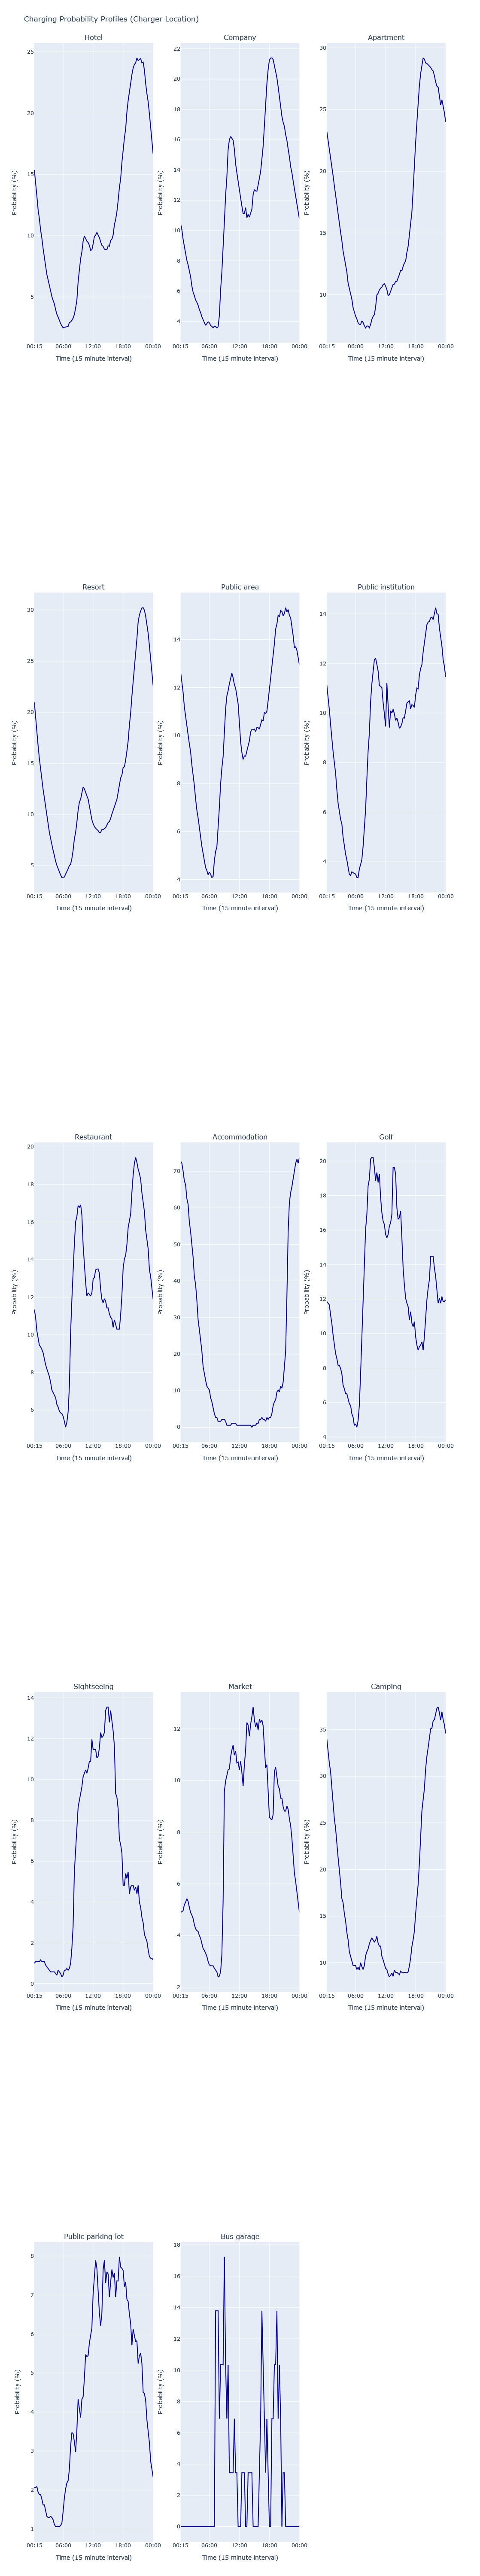

In [61]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

# Determine the number of unique locations
locations = charging_profile_plot_loc['Location'].unique()
num_locations = len(locations)

# Create subplots, each row will have 3 plots (as per col_wrap=3)
rows = int(np.ceil(num_locations / 3))
fig = make_subplots(rows=rows, cols=3, subplot_titles=locations)

# Iterate over locations to create a plot for each
for i, loc in enumerate(locations):
    # Filter the dataframe for the current location
    df_loc = charging_profile_plot_loc[charging_profile_plot_loc['Location'] == loc]
    
    # Calculate row and col index for the current subplot
    row = int(i / 3) + 1
    col = (i % 3) + 1
    
    # Create the line plot for the current location
    fig.add_trace(
        go.Scatter(x=df_loc['Time'], y=df_loc['Probability'], name=loc, mode='lines', line=dict(color="#000099")),
        row=row, col=col
    )
    
    # Update x-axis labels
    fig.update_xaxes(title_text="Time (15 minute interval)", tickvals=[1, 24, 48, 72, 96], ticktext=["00:15", "06:00", "12:00", "18:00", "00:00"], row=row, col=col)

# Update y-axis labels
fig.update_yaxes(title_text="Probability (%)")

# Update the layout and title
fig.update_layout(height=300*rows, title_text='Charging Probability Profiles (Charger Location)', showlegend=False)

# Save the figure
# fig.write_image('Figure_2.tiff', format='tiff', scale=3)

# Show the figure in case you want to see it in the notebook or script output
fig.show()

This code uses Plotly's `make_subplots` function to create a grid of subplots similar to Seaborn's `FacetGrid`. Each subplot represents a different 'Location'. The `update_xaxes` and `update_yaxes` methods are used to set custom axis labels and tick labels. Finally, `write_image` is used to save the figure as a TIFF file with high resolution.

Please note that you might need to adjust the `height` parameter in `update_layout` based on your actual number of locations to ensure that each subplot has enough space.